# Time Series Forecasting
**Project**: M5 Project 5
**Author**: Jacob Buysse

In this project we will be performing regression modeling on flights from the New York area and adding complimentary data to see how it improves perfromance.

In this notebook we will be using...

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Part I

We need to load and clean the given datasets (years 2013 through 2017).  First let us load the files and look at the head/info/describe results.

In [3]:
df = pd.concat([pd.read_csv(f'./nycflights{year}.csv') for year in np.arange(13, 18)], ignore_index=True)
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,827,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,931,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,633,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,436,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,270,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590212 entries, 0 to 1590211
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   year            1590212 non-null  int64  
 1   month           1590212 non-null  int64  
 2   day             1590212 non-null  int64  
 3   dep_time        1546820 non-null  float64
 4   sched_dep_time  1590212 non-null  int64  
 5   dep_delay       1546816 non-null  float64
 6   arr_time        1544926 non-null  float64
 7   sched_arr_time  1590212 non-null  int64  
 8   arr_delay       1541209 non-null  float64
 9   carrier         1590212 non-null  object 
 10  flight          1590212 non-null  int64  
 11  tailnum         1580620 non-null  object 
 12  origin          1590212 non-null  object 
 13  dest            1590212 non-null  object 
 14  air_time        1541209 non-null  float64
 15  distance        1590212 non-null  int64  
 16  hour            1590212 non-null  in

In [5]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,1.590212e+06,1.590212e+06,1.590212e+06,1.546820e+06,1.590212e+06,1.546816e+06,1.544926e+06,1.590212e+06,1.541209e+06,1.590212e+06,1.541209e+06,1.590212e+06,1.590212e+06,1.590212e+06
mean,2.014954e+03,6.519429e+00,1.573097e+01,1.343324e+03,1.340302e+03,1.318898e+01,1.486478e+03,1.525537e+03,5.984620e+00,6.297516e+02,1.580241e+02,1.100884e+03,1.314002e+01,2.629984e+01
std,1.415598e+00,3.410859e+00,8.775179e+00,4.959959e+02,4.739862e+02,4.445500e+01,5.476208e+02,5.143368e+02,4.826098e+01,4.291571e+02,9.602689e+01,7.497539e+02,4.719695e+00,1.953774e+01
min,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,-1.120000e+02,1.000000e+00,1.000000e+00,-1.120000e+02,1.000000e+00,1.900000e+01,1.700000e+01,0.000000e+00,0.000000e+00
25%,2.014000e+03,4.000000e+00,8.000000e+00,9.030000e+02,9.050000e+02,-5.000000e+00,1.059000e+03,1.120000e+03,-1.800000e+01,2.490000e+02,8.900000e+01,5.440000e+02,9.000000e+00,6.000000e+00
50%,2.015000e+03,7.000000e+00,1.600000e+01,1.349000e+03,1.347000e+03,-2.000000e+00,1.515000e+03,1.542000e+03,-6.000000e+00,5.760000e+02,1.360000e+02,9.440000e+02,1.300000e+01,2.900000e+01
75%,2.016000e+03,9.000000e+00,2.300000e+01,1.747000e+03,1.730000e+03,1.100000e+01,1.937000e+03,1.945000e+03,1.200000e+01,9.670000e+02,2.010000e+02,1.416000e+03,1.700000e+01,4.400000e+01
max,2.017000e+03,1.200000e+01,3.100000e+01,2.400000e+03,2.359000e+03,1.548000e+03,2.400000e+03,2.359000e+03,1.589000e+03,1.828000e+03,7.230000e+02,4.983000e+03,2.300000e+01,5.900000e+01


We have 1,590,212 rows with 19 features.  The first three columns (year/month/day) are the date.  The next column, dep_time, contains nulls which must indicate canceled flights.  Let us just model scheduled flights per day and get our aggregate counts to start.

In [6]:
df['date'] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
counts = df.groupby('date').size().to_frame('count').reset_index()
counts['year'] = counts.date.apply(lambda value: value.year)
counts['doy'] = counts.date.apply(lambda value: value.timetuple().tm_yday)
counts.head()

,date,count,year,doy
0,2013-01-01,842,2013,1
1,2013-01-02,943,2013,2
2,2013-01-03,914,2013,3
3,2013-01-04,915,2013,4
4,2013-01-05,720,2013,5


This looks good.  Let us make sure there aren't any gaps (days with no records).

In [7]:
counts.groupby('year').size()

year
2013    365
2014    365
2015    365
2016    366
2017    365
dtype: int64

There are no gaps, but 2016 was a leap year so it had an extra day.  Let us look at plots for each year.

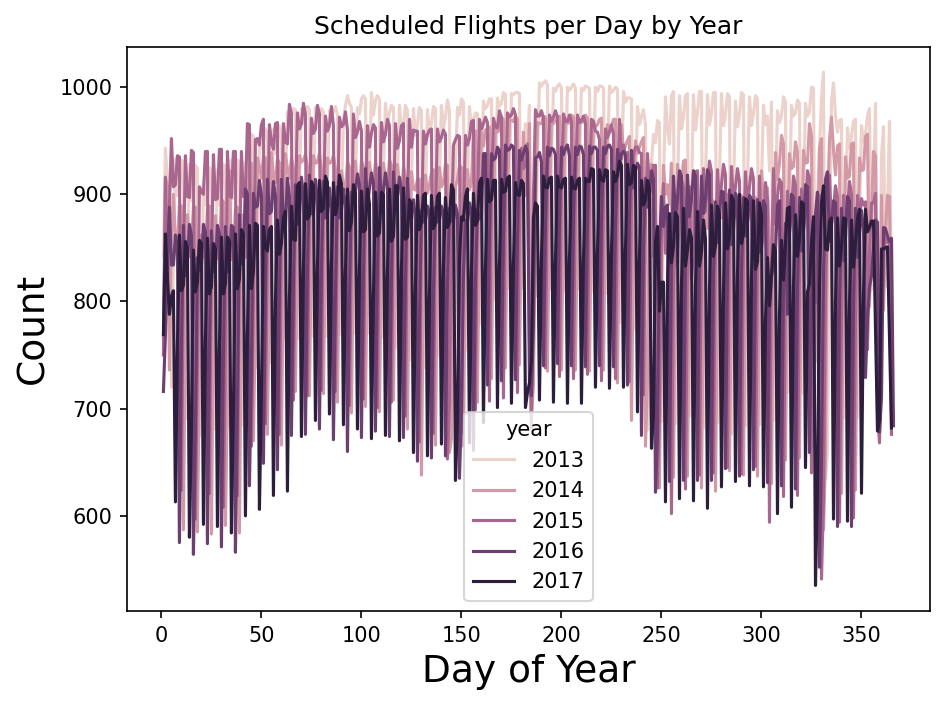

In [8]:
plot = sns.lineplot(data=counts, x='doy', y='count', hue='year')
plot.set(title='Scheduled Flights per Day by Year', xlabel='Day of Year', ylabel='Count');
plot.figure.savefig("count_per_day_by_year.png")

We can see some common seasonal patterns (similar patterns for months across years, and some kind of a repeating pattern for weeks).  Let us engineer some seasonality features that might aid in predicitons.

In [9]:
counts['month'] = counts.date.apply(lambda value: value.month).astype('category')
counts['weekday'] = counts.date.apply(lambda value: value.weekday()).astype('category')
counts['weekend'] = counts.date.apply(lambda value: value.weekday() >= 5)
counts['leapday'] = counts.date.apply(lambda value: value.month == 2 and value.day == 29)
counts.head(10)

,date,count,year,doy,month,weekday,weekend,leapday
0,2013-01-01,842,2013,1,1,1,False,False
1,2013-01-02,943,2013,2,1,2,False,False
2,2013-01-03,914,2013,3,1,3,False,False
3,2013-01-04,915,2013,4,1,4,False,False
4,2013-01-05,720,2013,5,1,5,True,False
5,2013-01-06,832,2013,6,1,6,True,False
6,2013-01-07,933,2013,7,1,0,False,False
7,2013-01-08,899,2013,8,1,1,False,False
8,2013-01-09,902,2013,9,1,2,False,False
9,2013-01-10,932,2013,10,1,3,False,False


In [10]:
counts[counts.date == datetime.datetime(year=2016, month=2, day=29)]

,date,count,year,doy,month,weekday,weekend,leapday
1154,2016-02-29,914,2016,60,2,0,False,True


Now let us augment our dataset with some weather data.  We have downloaded the NOAA Climate data for LaGuardia (code `USW00014732`).  Let us load that data and see what we have.

In [11]:
climate_df = pd.read_csv(
    './USW00014732.csv',
    header=None, names=['id', 'ymd', 'element', 'value', 'mflag', 'qflag', 'sflag', 'time'],
    usecols=['ymd', 'element', 'value'])
climate_df.head()

,ymd,element,value
0,19391007,TMAX,256
1,19391008,TMAX,217
2,19391009,TMAX,272
3,19391010,TMAX,311
4,19391011,TMAX,244


Let us filter this down to just the date range we care about and just the top 5 elements.  Then let us pivot the elements into columns and add a parsed date column.

In [12]:
climate_mask = \
    (climate_df.ymd >= 20130000) & \
    (climate_df.ymd < 20180000) & \
    (climate_df.element.isin(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']))
cdf = climate_df[climate_mask].pivot(index='ymd', columns='element', values='value')
cdf['date'] = cdf.index.map(lambda value: datetime.datetime(year=int(value / 1e4), month=int((value % 1e4) / 1e2), day=int(value % 1e2)))
cdf.head()

element,PRCP,SNOW,SNWD,TMAX,TMIN,date
ymd,,,,,,
20130101,0,0,0,50,-28,2013-01-01
20130102,0,0,0,11,-50,2013-01-02
20130103,0,0,0,11,-39,2013-01-03
20130104,0,0,0,39,6,2013-01-04
20130105,0,0,0,61,11,2013-01-05


Now let us load some holiday information.

In [13]:
holiday_df = pd.read_csv('./US Holiday Dates (2004-2021).csv')
holiday_df.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [14]:
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [15]:
holiday_df.describe()

,Month,Day,Year
count,342.000000,342.000000,342.000000
mean,7.263158,15.853801,2012.500000
std,3.899889,9.653330,5.195729
min,1.000000,1.000000,2004.000000
25%,4.000000,6.000000,2008.000000
50%,9.000000,16.500000,2012.500000
75%,11.000000,24.000000,2017.000000
max,12.000000,31.000000,2021.000000


Let us parse the date column so we can properly join on it.  We will also drop all the columns we are not using.

In [16]:
holiday_df["date"] = pd.to_datetime(holiday_df.Date)
holiday_df = holiday_df.drop(columns=["Date", "WeekDay", "Month", "Day", "Year"])
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Holiday  342 non-null    object        
 1   date     342 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.5+ KB


While holiday information is useful, let is also add three days before and after each holiday.  This should account for pre-holiday and post-holiday travel plans (within a reasonable boundary).  This may be redundant for things like Christmas Eve, but the model shouldn't really care about the collinearity.

In [17]:
def get_offsets(offset):
    result_df = holiday_df.copy()
    result_df.date = result_df.date.apply(lambda value: value + datetime.timedelta(days=offset))
    result_df.Holiday = result_df.Holiday + f" {offset:+d}"
    return result_df
offsets = list(map(get_offsets, [-3, -2, -1, 1, 2, 3]))
offsets.append(holiday_df)
all_holiday_df = pd.concat(offsets)
all_holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2394 entries, 0 to 341
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Holiday  2394 non-null   object        
 1   date     2394 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 56.1+ KB


Now we will add a dummy true column so we can pivot to add a column for each holiday (and holiday adjacent).

In [18]:
all_holiday_df['value'] = True
hdf = all_holiday_df \
    .pivot(index='date', columns='Holiday', values='value') \
    .fillna(False) \
    .groupby('date') \
    .max()
hdf.head()

Holiday,4th of July,4th of July +1,4th of July +2,4th of July +3,4th of July -1,4th of July -2,4th of July -3,Christmas Day,Christmas Day +1,Christmas Day +2,...,Washington's Birthday -1,Washington's Birthday -2,Washington's Birthday -3,Western Easter,Western Easter +1,Western Easter +2,Western Easter +3,Western Easter -1,Western Easter -2,Western Easter -3
date,,,,,,,,,,,,,,,,,,,,,
2003-12-29,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-12-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Finally, let us merge all of our dataframes.

In [19]:
final_df = counts \
    .merge(cdf, on='date', how='inner') \
    .merge(hdf, on='date', how='left')
for column in hdf.columns.values:
    final_df[column] = final_df[column].fillna(False)
final_df.head()

,date,count,year,doy,month,weekday,weekend,leapday,PRCP,SNOW,...,Washington's Birthday -1,Washington's Birthday -2,Washington's Birthday -3,Western Easter,Western Easter +1,Western Easter +2,Western Easter +3,Western Easter -1,Western Easter -2,Western Easter -3
0,2013-01-01,842,2013,1,1,1,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2013-01-02,943,2013,2,1,2,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2013-01-03,914,2013,3,1,3,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
3,2013-01-04,915,2013,4,1,4,False,False,0,0,...,False,False,False,False,False,False,False,False,False,False
4,2013-01-05,720,2013,5,1,5,True,False,0,0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
final_df.to_feather('counts.feather')